# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print(brain_name,brain)

ReacherBrain Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.24599999450147153


### 4. Programming A Smart Agent

A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

[Reload Jupyternotebook Hint](https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)

In [6]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload

In [7]:
%autoreload 1
%aimport ddpg_agent

from ddpg_agent import Agent

env_info = env.reset(train_mode=True)[brain_name] # Create simulation environment

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size=state_size, action_size=action_size,num_agents=num_agents, random_seed=0)

cuda:0


In [8]:
def smart_agent_ddpg(n_episodes=5000, max_t=1000):
    
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        
    """
    
    scores_list = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)       # last 100 scores
    
    env_solved = False                      # Tracking when the environment is solved
    counter_episods = 0                             # Maintain average score of 100 when env is solved
                              
    
    #agent.reset() 

    for i_episode in range(1, n_episodes+1):
        
        
        env_info = env.reset(train_mode=True)[brain_name]
        #state = env_info.vector_observations[0] # current state
        states = env_info.vector_observations    # get the current state (for each agent)
        
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        
        for t in range(max_t):
        
        
            actions = agent.act(states, add_noise = True)    # Predict the best action for the current state.(for each agent)
            #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            
            # current state, action, reward, new state are stored in the experience replay
            agent.step(states, actions, rewards, next_states, dones)
            
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        scores_window.append(np.mean(scores))            # save average attained scores from all agents
        scores_list.append(np.mean(scores))              # save average attained scores from all agents
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 15 == 0: 
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)))
            
        
        if (np.mean(scores_window)>=30.0): #requirement
            
            if(not env_solved):
                
                print('\nEnvironment first reached Average Score: {:.3f} at episode {:d} \t'.format(np.mean(scores_window),i_episode))
            
            
            env_solved = True
            
            counter_episods +=1
                        
            if( counter_episods==100):
                
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)))
                #save the model
                torch.save(agent.actor_local.state_dict(), 'actor_mdl.pth')
                torch.save(agent.critic_local.state_dict(), 'critic_mdl.pth')
                
                break
        
        elif(env_solved):
            print("\nUnfor.. score dropped below 30, resetting the counter!")
            env_solved = False
            counter_episods = 0
            
    return scores_list


In [9]:
t1 = time.time()
scores_list = smart_agent_ddpg()
t2 = time.time()

print("total time [min]: ",(t2-t1)/60)

Episode 15	Average Score: 1.468
Episode 30	Average Score: 9.879
Episode 45	Average Score: 19.154
Episode 60	Average Score: 23.724
Episode 75	Average Score: 26.519
Episode 90	Average Score: 28.401
Episode 102	Average Score: 30.049
Environment first reached Average Score: 30.049 at episode 102 	
Episode 105	Average Score: 31.155
Episode 120	Average Score: 36.305
Episode 135	Average Score: 37.619
Episode 150	Average Score: 37.551
Episode 165	Average Score: 37.616
Episode 180	Average Score: 37.604
Episode 195	Average Score: 37.557
Episode 201	Average Score: 37.558
Environment solved in 201 episodes!	Average Score: 37.558
total time [min]:  81.42062557140986


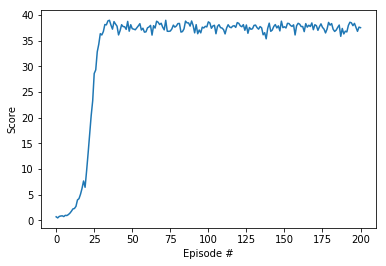

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_list)), scores_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
env.close()